<a href="https://colab.research.google.com/github/SamiMoqbel/Gradient-Descent-on-Preproccesed-Dataset/blob/main/Machine1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-3 Studying And Cleanning Data

In [ ]:
import pandas as pd

carsDf= pd.read_csv("cars.csv")

print(carsDf.info())
print("\n============\n")
print(carsDf.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        396 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB
None


    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0  

In [ ]:
print(carsDf.isnull().sum())
print("\n==================\n")
print(carsDf[carsDf.isnull().all(axis=1)].count())





mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          2
dtype: int64


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


**Notes**

As We can Notice in the above sections there is many features with null values in some rows but there is no rows with full null values so we dont need to delete full rows in order not lose main data but we can imputate the rows to get the closet possible solution to null values

**=========================================================================**

In [ ]:
print(carsDf.describe())
print("\n============\n")


              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000  




In [ ]:
print(carsDf['origin'].mode())
carsDf['origin'].fillna(value=carsDf['origin'].mode().iloc[0], inplace=True)



0    USA
Name: origin, dtype: object


In [ ]:
print(carsDf.isnull().sum())
print("\n==================\n")


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64




In [ ]:
carsDf['horsepower'].fillna(value=carsDf['horsepower'].mean(), inplace=True)


In [ ]:
print(carsDf.isnull().sum())
print("\n==================\n")

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64




**Note**

When we described the data in order to fill missing values according to what mean,median and mode values are we found that some features are category feature that is they are non-numerical fields like **origin** so in some fields we used the mean and in other we used the mode and as can be noticed there is no null values anymore in the data

**=======================================================================**

# 4 - Country With Better Fuel Economy


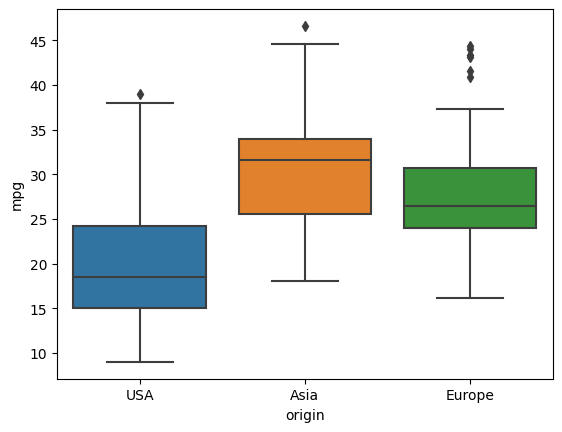

In [ ]:
import seaborn as sns

sns.boxplot(data=carsDf, y="mpg", x="origin");

**Note**

We can notice from the above **boxplot** that the country producing cars with better fuel economy are countries in Asia since most of their mpg data (that is between first and third quartile) are between 25 to 35 and that is a little bit higher than Europe countires and extremely higher than USA productions.

**============================================================================**

#5-6 Gaussian Distibution

Text(0.5, 1.0, 'Mode= 14.5\n Mean= 15.568090452261307\n Median= 15.5 ')

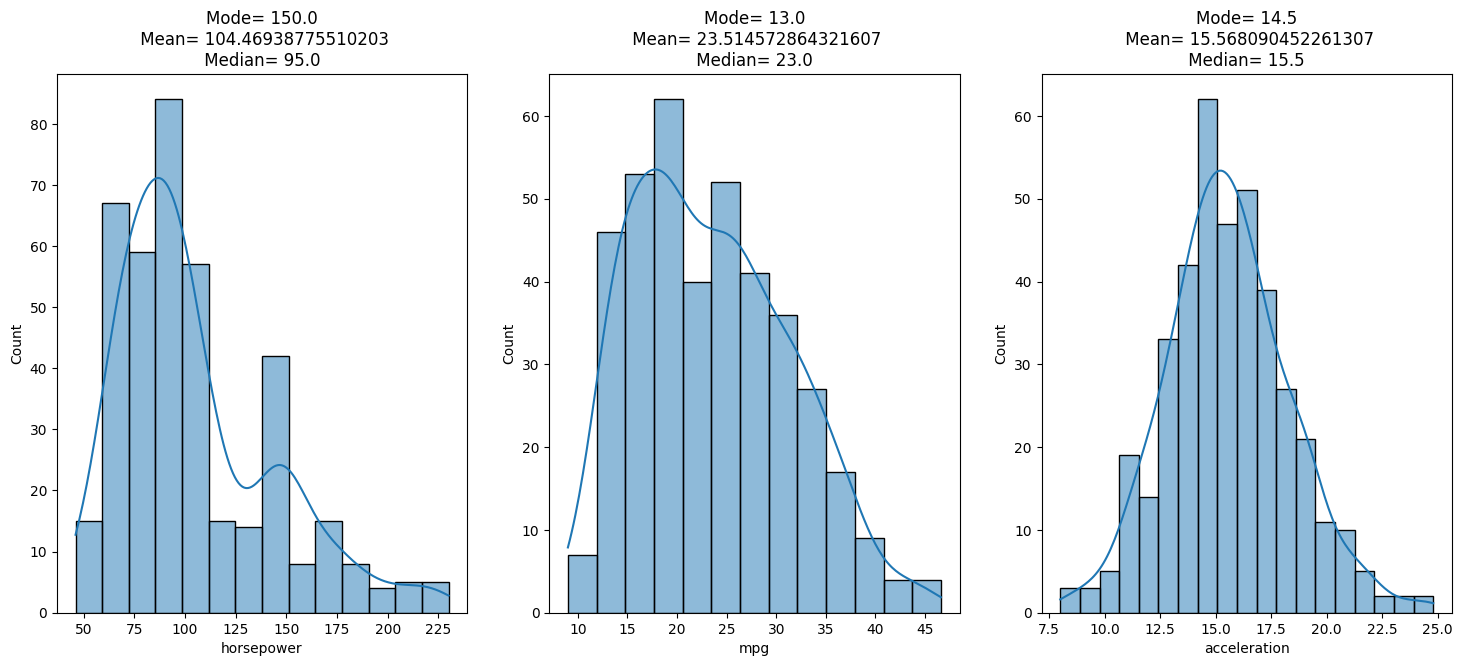

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(18, 7),ncols=3)

sns.histplot(data=carsDf, x="horsepower",ax=axs[0], kde=True)
axs[0].set_title(f"Mode= {carsDf['horsepower'].mode().iloc[0]}\n Mean= {carsDf['horsepower'].mean()}\n Median= {carsDf['horsepower'].median()} ")

sns.histplot(data=carsDf, x="mpg",ax=axs[1], kde=True)
axs[1].set_title(f"Mode= {carsDf['mpg'].mode().iloc[0]}\n Mean= {carsDf['mpg'].mean()}\n Median= {carsDf['mpg'].median()} ")


sns.histplot(data=carsDf, x="acceleration",ax=axs[2], kde=True)
axs[2].set_title(f"Mode= {carsDf['acceleration'].mode().iloc[0]}\n Mean= {carsDf['acceleration'].mean()}\n Median= {carsDf['acceleration'].median()} ")


**Note**

According to the plots its obviously that acceleration has the most likely shaped gaussian distribution since there is no skewness in the data to any side and it has a nearly symmetry kde not like for horse power where dara is hard skewed to right and also for mpg with little skewness.

In another words by numbers as shown above each plot the data that has gaussian distribution must has mean, mode and median equally alike so for horsepower we can find that mpg and horsepower features have quitely variance in theese valuse but for acceleration  its almost equal

**===========================================================================**

# 7- Scatter Plot


<Axes: xlabel='horsepower', ylabel='mpg'>

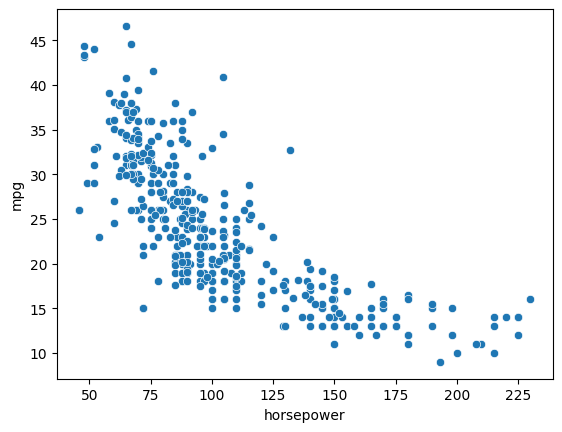

In [ ]:
sns.scatterplot(data=carsDf, x='horsepower', y='mpg')

**Note**

From the  scatter plot above we can notice strong negative correlation between the two features that is when the values of horsepower increases we can the mpg values decreasing and thats normal in real life (according to my slight informations about cars) .

**============================================================================**

# 8-9 simple closed form

     horsepower
0         130.0
1         165.0
2         150.0
3         150.0
4         140.0
..          ...
393        86.0
394        52.0
395        84.0
396        79.0
397        82.0

[398 rows x 1 columns]


0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64


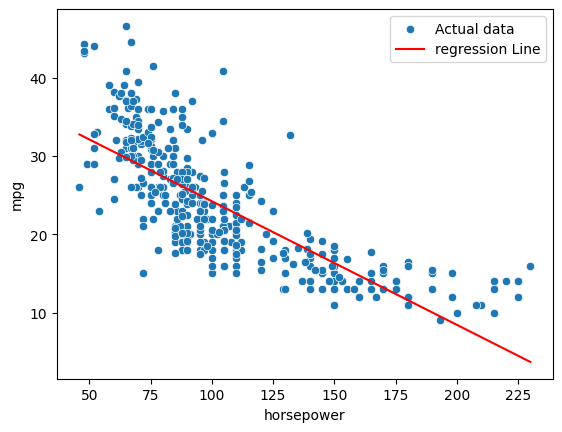

In [ ]:
import numpy as np


X=carsDf[['horsepower']]
y=carsDf['mpg']

print(X)
print("\n=====================\n")
print(y)

ones = np.ones(len(X))

xWithOnes=  np.c_[ones, X]

W = (np.linalg.inv(xWithOnes.T @ xWithOnes)) @ (xWithOnes.T @ y)

fig , axis= plt.subplots(ncols=1)

sns.scatterplot(data=carsDf, x='horsepower',ax=axis, y='mpg', label= "Actual data")

predictedY_closed=xWithOnes @ W

sns.lineplot(data=carsDf, x='horsepower',ax=axis, y=predictedY_closed , label= "regression Line", color="red" )
plt.legend()



**Note**

In this part we predicted the values of mpg according to horsepower feature by linear reggresion closed form method . So we first add a feature(column) with ones in order to fit it to Wo then we apllied the formula on the matrix we have and the result was a linear function that does satisfy the middle points but not really for border pointes( the pointes at the start and end of data)
**============================================================================**

     horsepower
0         130.0
1         165.0
2         150.0
3         150.0
4         140.0
..          ...
393        86.0
394        52.0
395        84.0
396        79.0
397        82.0

[398 rows x 1 columns]


0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64




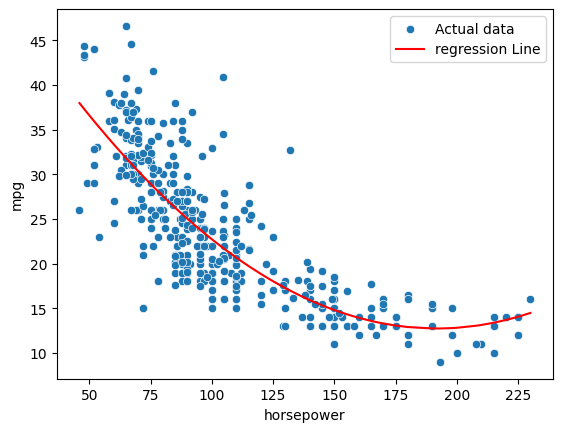

In [ ]:
import numpy as np


X=carsDf[['horsepower']]
y=carsDf['mpg']

print(X)
print("\n=====================\n")
print(y)
print("\n=====================\n")

ones = np.ones(len(X))

xWithOnes=  np.c_[ones, X]

quadraticX = np.square(xWithOnes[:, 1])

Z= np.c_[xWithOnes,quadraticX]

W = (np.linalg.inv(Z.T @ Z)) @ (Z.T @ y)


fig , axis= plt.subplots(ncols=1)

sns.scatterplot(data=carsDf, x='horsepower',ax=axis, y='mpg', label= "Actual data")

predictedY=Z @ W

sns.lineplot(data=carsDf, x='horsepower',ax=axis, y=predictedY , label= "regression Line", color="red" )
plt.legend()
# print("\n=====================\n")
# print("Original Matrix:")
# print(X)
# print("\n=====================\n")
# print("Matrix with ones:")
# print(xWithOnes)
# print("\n=====================\n")
# print("\nMatrix with Squared Column:")
# print(Z)
# print("\n=====================\n")


**Note**

In this part we predicted the values of mpg according to horsepower feature by linear reggresion closed form method . So we first add a feature(column) with ones in order to fit it to Wo then we apllied the formula on the matrix we have but this time with quadratic feautres so after adding ones we also added x2 feature that has values equal to squares of x1 values. And the result was a  function that satisfy mostly all points and the shape of it

**============================================================================**


# 10 - Gradient Decsent

     horsepower
0         130.0
1         165.0
2         150.0
3         150.0
4         140.0
..          ...
393        86.0
394        52.0
395        84.0
396        79.0
397        82.0

[398 rows x 1 columns]


0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64


0      0.669196
1      1.586599
2      1.193426
3      1.193426
4      0.931311
         ...   
393   -0.484111
394   -1.375302
395   -0.536534
396   -0.667591
397   -0.588957
Name: horsepower, Length: 398, dtype: float64


Alpha : 0.05
Number Of Iterations  : 150
Initial Coffecients: [5 2]


Calculated Coffecients: [23.51457033 -6.02195988]




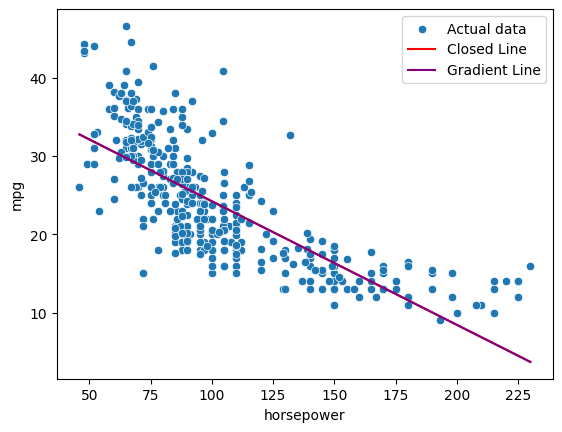

In [ ]:
import numpy as np
from scipy.stats import zscore


X=carsDf[['horsepower']]
y=carsDf['mpg']
zScores= zscore(X['horsepower'])

print(X)
print("\n=====================\n")
print(y)
print("\n=====================\n")
print(zScores)
print("\n=====================\n")

ones = np.ones(len(zScores))

xWithOnes=  np.c_[ones, zScores]

alpha=0.05
noOfIterations=150

W=np.array([5,2])
print(f"Alpha : {alpha}")
print(f"Number Of Iterations  : {noOfIterations}")
print(f"Initial Coffecients: {W}")
# print(len(X))
print("\n=======================\n")

for i in range(noOfIterations):
  # print(f"I:{i}")
  f_x= xWithOnes @ W
  E1= np.sum((f_x - y) * xWithOnes[:,0]) * (2 / len(X))
  E2= np.sum((f_x - y) * xWithOnes[:,1]) * (2 / len(X))

  E=np.array([E1,E2])
  alphaE= alpha * E

  # print(f"alpha E :{E}")
  W = W - alphaE


print(f"Calculated Coffecients: {W}")
print("\n=======================\n")

# print(E1)
# print(E2)
# print("\n=======================\n")
# print(E)
# print("\n=======================\n")

# print(f"f(x) : {f_x}")
# print("\n=======================\n")

fig , axis= plt.subplots(ncols=1)

sns.scatterplot(data=carsDf, x='horsepower',ax=axis, y='mpg', label= "Actual data")

predictedY_gradient=xWithOnes @ W

sns.lineplot(data=carsDf, x='horsepower',ax=axis, y=predictedY_closed , label= "Closed Line", color="red" )

sns.lineplot(data=carsDf, x='horsepower',ax=axis, y=predictedY_gradient , label= "Gradient Line", color="purple" )
plt.legend()





**Note**

In the above plot we can figure that we could reach the closed linear regression by using gradient descent algorithim for example in the above code we iterated for about 150 times and we could get it even with less iterations. so we avoided the cubic performance measure **O(d^3)**.

**===========================================================================**